#Регрессия

- используемый датасет: Bike Sharing (https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)

задание:
- загрузить данные 👾
- проанализировать их 👾
- предобработать данные 👾
- попробовать разные методы регрессии 👾
- получить метрики 👾
- визуализировать регрессию на одном из параметров 👾
- коэффициент детерминации ≥ 0.85 👾

In [ ]:
pip install ucimlrepo

In [ ]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

X = bike_sharing.data.features
y = bike_sharing.data.targets

display(bike_sharing.variables) #поясняющая информация
display(X)
print(y)

,name,role,type,demographic,description,units,missing_values
0,instant,ID,Integer,None,record index,None,no
1,dteday,Feature,Date,None,date,None,no
2,season,Feature,Categorical,None,"1:winter, 2:spring, 3:summer, 4:fall",None,no
3,yr,Feature,Categorical,None,"year (0: 2011, 1: 2012)",None,no
4,mnth,Feature,Categorical,None,month (1 to 12),None,no
5,hr,Feature,Categorical,None,hour (0 to 23),None,no
6,holiday,Feature,Binary,None,weather day is holiday or not (extracted from ...,None,no
7,weekday,Feature,Categorical,None,day of the week,None,no
8,workingday,Feature,Binary,None,"if day is neither weekend nor holiday is 1, ot...",None,no
9,weathersit,Feature,Categorical,None,"- 1: Clear, Few clouds, Partly cloudy, Partly ...",None,no


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


       cnt
0       16
1       40
2       32
3       13
4        1
...    ...
17374  119
17375   89
17376   90
17377   61
17378   49

[17379 rows x 1 columns]


In [ ]:
X.info()  #информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.7+ MB


In [ ]:
#количество пустых значений
X.isnull().sum()

,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


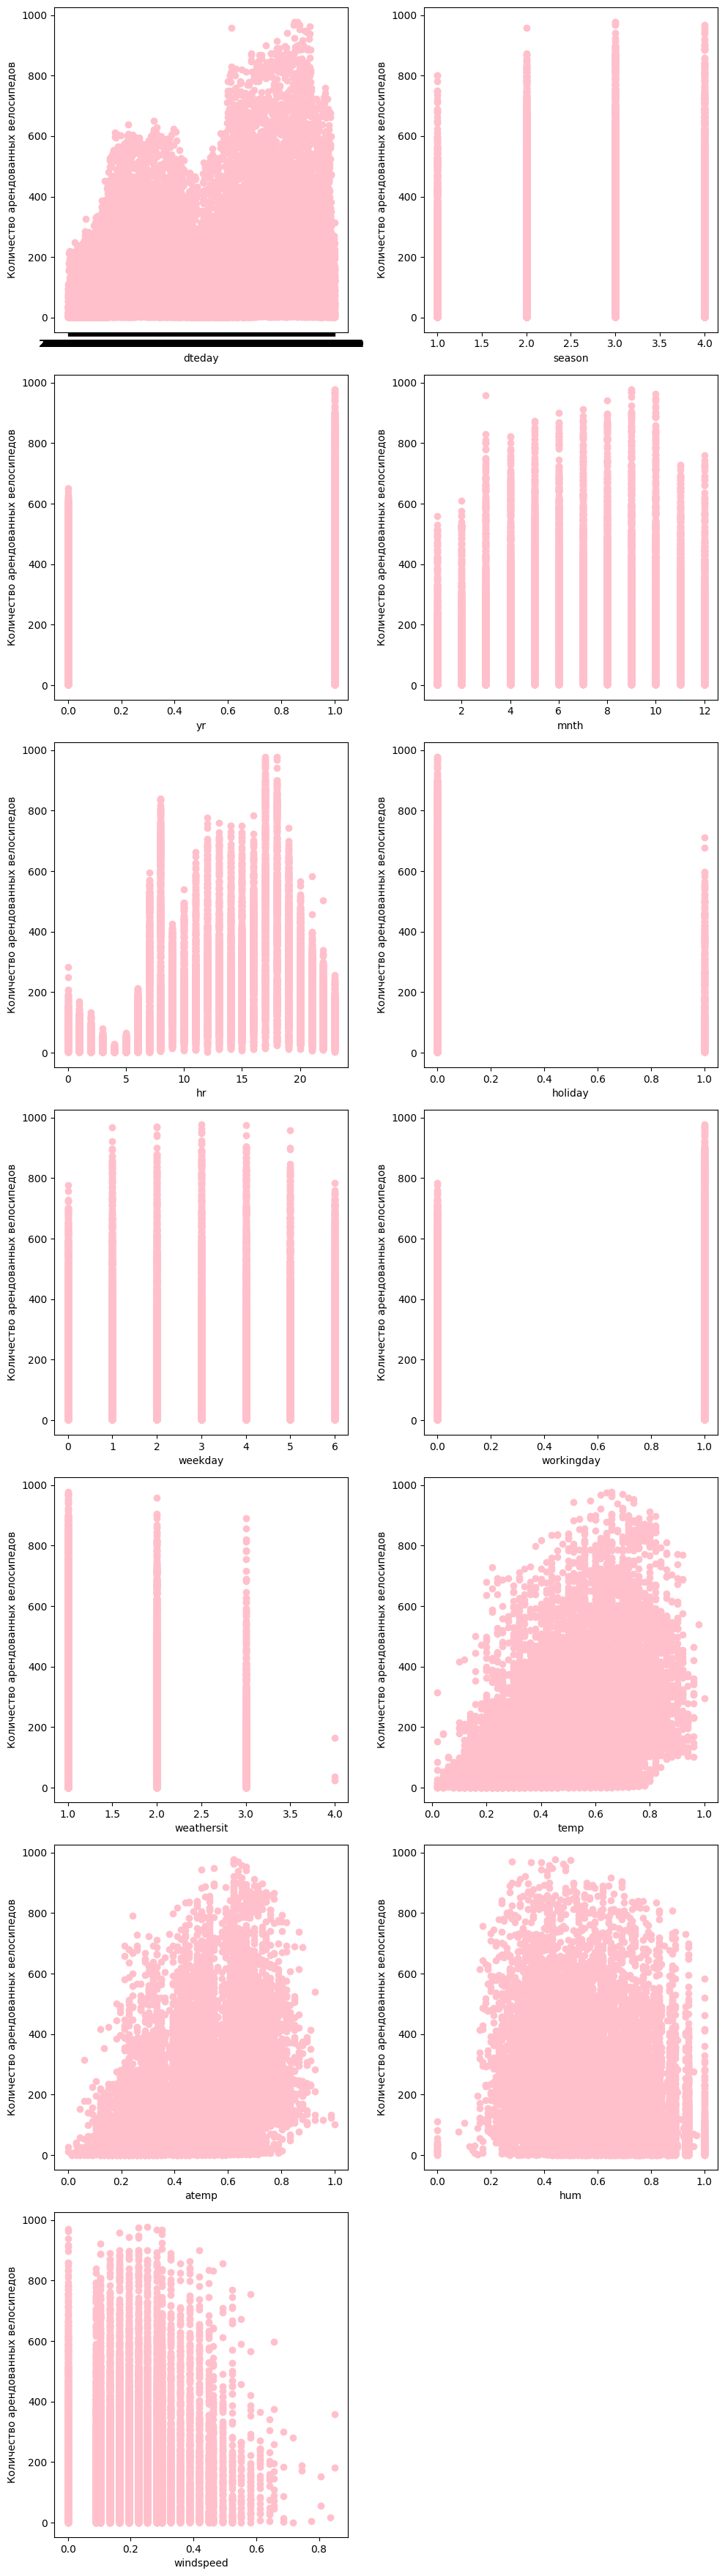

In [ ]:

num_rows = (len(X.columns) + 2 - 1)  # вычисляем количество строк
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

for i, column in enumerate(X.columns):
    ax = axs[i // 2, i % 2]
    ax.scatter(X[column], y, color='pink')
    ax.set_ylabel('Количество арендованных велосипедов')
    ax.set_xlabel(column)

#убираем пустые графики
for j in range(i + 1, num_rows * 2):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout() #чтобы графики не пересекались

В 2012 году кол-во арендованных велосипедов выросла

Text(0.5, 1.0, 'pearson correlation')

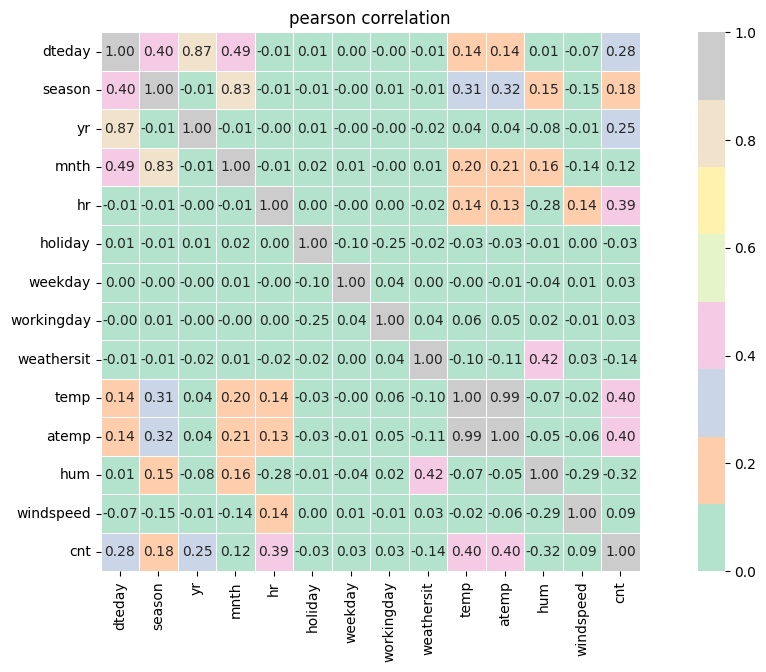

In [ ]:
df = pd.concat([X, y], axis=1)
corr_matrix = df
plt.figure(figsize=(15,7))

for col in corr_matrix.columns:
  if corr_matrix[col].dtype == "O":
        corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson", numeric_only = True)

sns.heatmap(corr_matrix, vmin=0., vmax=1., annot=True, fmt='.2f', cmap="Pastel2", cbar=True, linewidths=0.5, square=True)
plt.title("pearson correlation")

Зависимость месяца от сезона, температура и ощущаемая температура

In [ ]:
X = X.drop('dteday', axis=1)

In [ ]:
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (17379, 12) | y shape: (17379, 1) 


In [ ]:
#готовим датасет для обучения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##функция для вывода метрик

In [ ]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

#MSE - среднеквадратичная ошибка (RMSE - корень из неё) - отклонение остатков
#R2 - коэффициент детерминации
#Adj R - скорректированный р2

##Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  139.2115
  R2: 0.388
 Adjusted R2: 0.3859
 Cross Validated R2: 0.3875


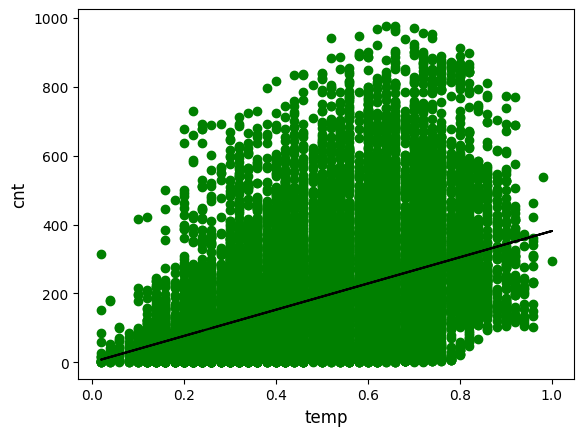

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df['temp'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['cnt'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('cnt', size=12)
plt.xlabel('temp', size=12)
plt.show()



##Полиномиальная регрессия

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
modelPR = LinearRegression()

modelPR.fit(X_p_train, y_p_train)

y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  108.9289
  R2: 0.6244
 Adjusted R2: 0.5886
 Cross Validated R2: 0.6263


Text(0.5, 0, 'temp')

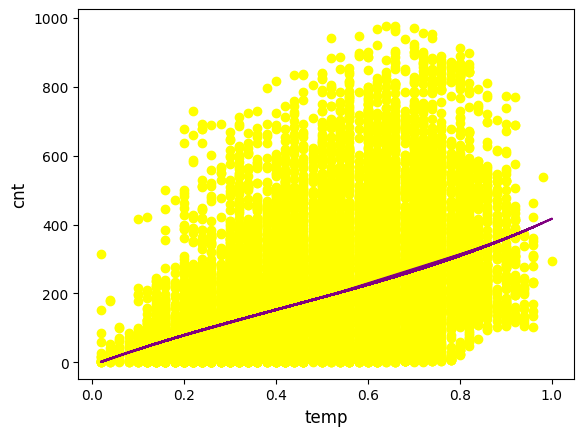

In [ ]:
X2 = df['temp'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['cnt'].values


poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='yellow')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='purple')
plt.ylabel('cnt', size=12)
plt.xlabel('temp', size=12)


##Регрессия дерева принятия решений

In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  59.5012
  R2: 0.8882
 Adjusted R2: 0.8878
 Cross Validated R2: 0.8867


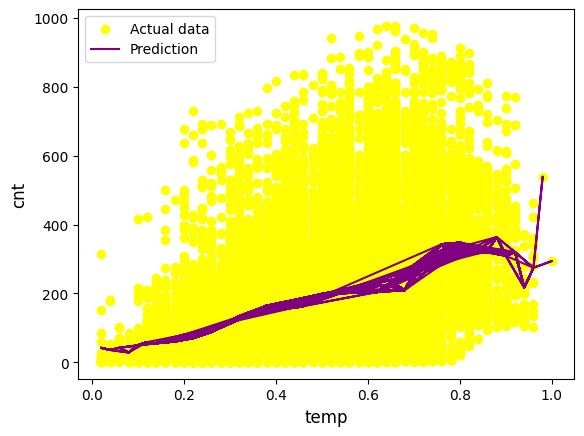

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Подготовка данных
X2 = df['temp'].values[:, np.newaxis]
y2 = df['cnt'].values

# Инициализация и обучение модели
modelDT = DecisionTreeRegressor()
modelDT.fit(X2, y2)

# Предсказание значений для графика
y2_pred = modelDT.predict(X2)

# Построение графика
plt.scatter(X2, y2, color='yellow', label='Actual data')
plt.plot(X2, y2_pred, color='purple', label='Prediction')
plt.ylabel('cnt', size=12)
plt.xlabel('temp', size=12)
plt.legend()
plt.show()


Коэф. детерм. равен 0,88, но график показывает отрицательный результат. Скорее всего проблема в самом датасете.

##Регрессия случайного леса

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  42.2472
  R2: 0.9436
 Adjusted R2: 0.9434
 Cross Validated R2: 0.9424


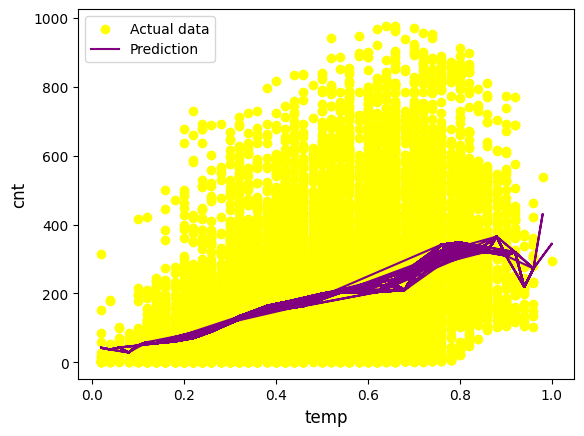

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Подготовка данных
X2 = df['temp'].values[:, np.newaxis]
y2 = df['cnt'].values

# Инициализация и обучение модели
modelRF = RandomForestRegressor(n_estimators=100, random_state=0)
modelRF.fit(X2, y2)

# Предсказание значений для графика
y2_pred = modelRF.predict(X2)

# Построение графика
plt.scatter(X2, y2, color='yellow', label='Actual data')
plt.plot(X2, y2_pred, color='purple', label='Prediction')
plt.ylabel('cnt', size=12)
plt.xlabel('temp', size=12)
plt.legend()
plt.show()

##регрессия опорных векторов

In [ ]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='linear')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  144.7556
  R2: 0.3383
 Adjusted R2: 0.336
 Cross Validated R2: 0.3275


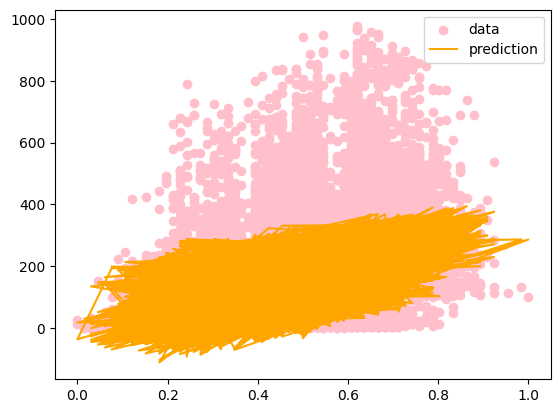

In [ ]:
plt.scatter(X_train['atemp'], y_train, color='pink', label='data')
plt.plot(X_train['atemp'], modelSVR.predict(X_train), color='orange', label='prediction')
plt.legend()

In [ ]:
from sklearn.svm import SVR

#Полиномиальное ядро
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  157.6836
  R2: 0.2148
 Adjusted R2: 0.2121
 Cross Validated R2: 0.2044


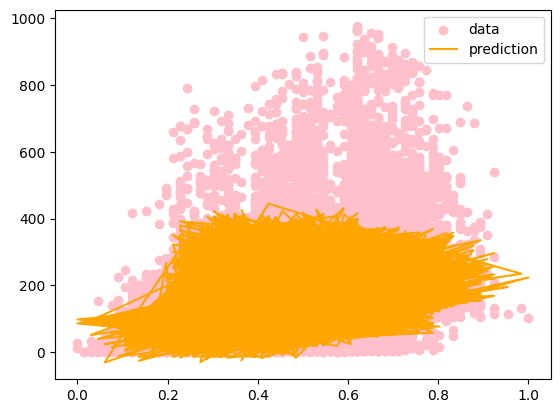

In [ ]:
plt.scatter(X_train['atemp'], y_train, color='pink', label='data')
plt.plot(X_train['atemp'], modelSVR.predict(X_train), color='orange', label='prediction')
plt.legend()

In [ ]:
# Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  140.309
  R2: 0.3783
 Adjusted R2: 0.3761
 Cross Validated R2: 0.3596


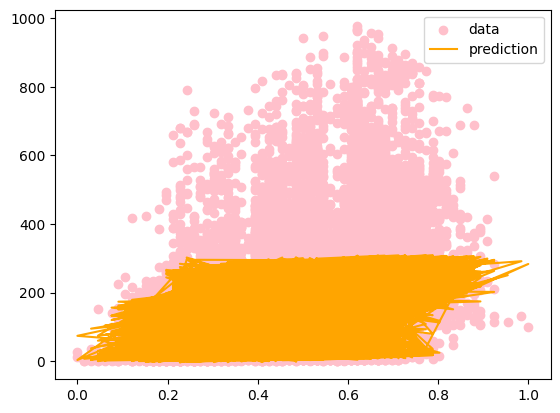

In [ ]:
plt.scatter(X_train['atemp'], y_train, color='pink', label='data')
plt.plot(X_train['atemp'], modelSVR.predict(X_train), color='orange', label='prediction')
plt.legend()

##Регрессия ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train, y_train)
y_en_pred = modelEN.predict(X_test)


In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  140.7637
  R2: 0.3743
 Adjusted R2: 0.3721
 Cross Validated R2: 0.3763


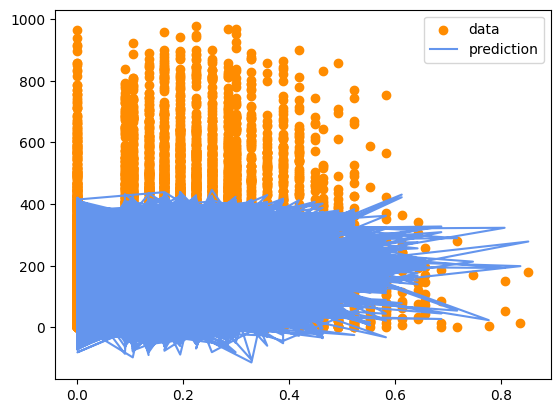

In [ ]:
plt.scatter(X_train['windspeed'], y_train, color='darkorange',label='data')
plt.plot(X_train['windspeed'], modelEN.predict(X_train), color='cornflowerblue',label='prediction')
plt.legend()
plt.show()